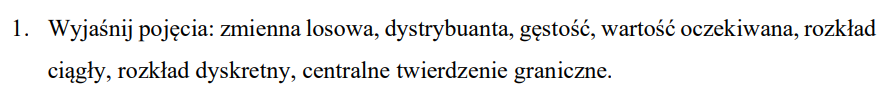

#### zmienna losowa, dystrybuanta, gęstość
Patrz wykład 1 ze statystyki Berlin.
#### wartość oczekiwana
Jest to spodziewany wynik doświadczenia losowego przy jego wielokronym powtarzaniu. Robimy poprostu średnią ważoną naszej zmiennej losowej, gdzie wagi to poprostu prawdopodobieństwo, że nasza zmienna losowa przyjmie akurat taką wartość.
#### rozkład ciągły, rozkład dyskretny
Obvious
#### centralne twierdzenie graniczne
Mamy zbiór danych o 1000 obserwacjach. Zbieramy sobie samples po 10 elementów bez zwracania i spisujemy ich średnią. Centralne twierdzenie graniczne głosi, że nawet jeśli nasze oryginalne 1000 obserwacji nie pochodzi z rozkładu normalnego, to rozkład tych średnich będzie standardowym rozkładem normalnym.

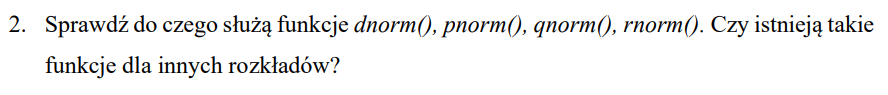

#### dnorm()
Zwraca PDF*
#### pnorm()
Zwraca CDF*
#### qnorm()
Zwraca kwantyl z rozkładu normalnego.
#### rnorm()
Generuje obserwacje z rozkładu normalnego z zadanymi parametrami.

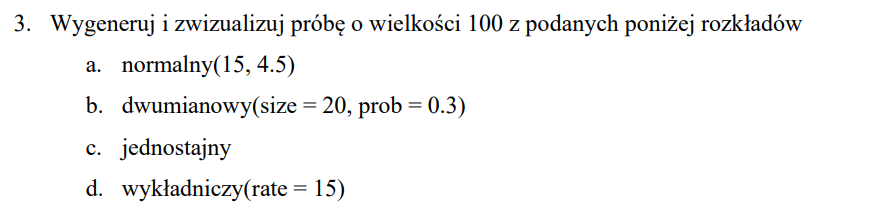

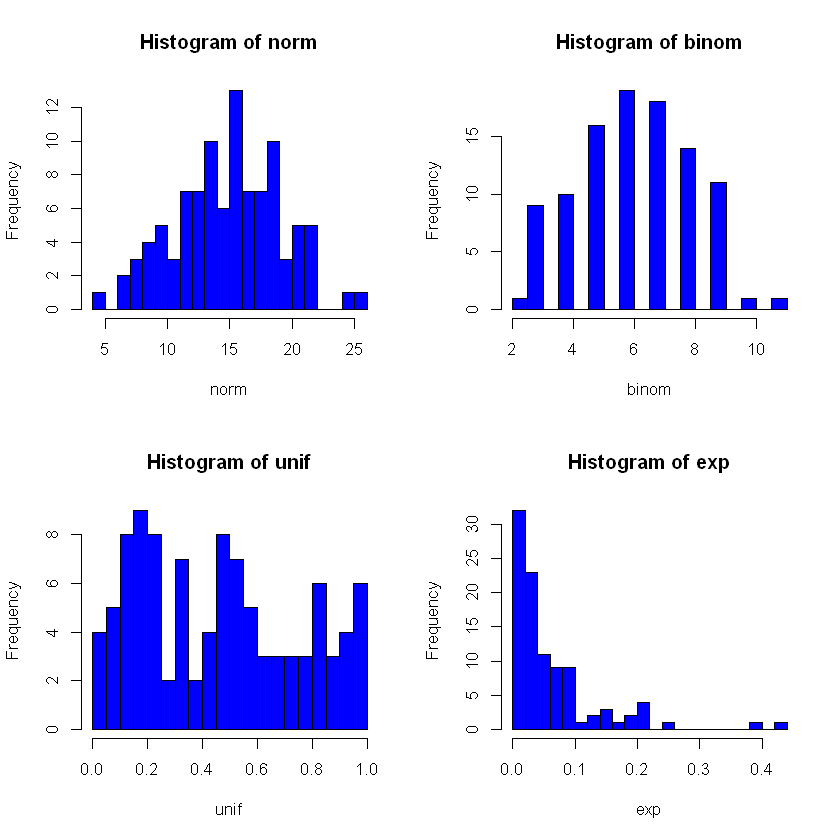

In [18]:
norm <- rnorm(100,15,4.5)
binom <- rbinom(100, size = 20, prob = 0.3)
unif <- runif(100)
exp <- rexp(100, rate = 15)

par(mfrow = c(2,2))
hist(norm, col = "blue", breaks = 30)
hist(binom, col = "blue", breaks = 30)
hist(unif, col = "blue", breaks = 30)
hist(exp, col = "blue", breaks = 30)

### Zadanie 4.
Co oznaczają parametry w podanych rozkładach?

In [ ]:
norm <- rnorm(100,15,4.5)  # liczba samples, średnia, wariancja

binom <- rbinom(100, size = 20, prob = 0.3)
# liczba samples jakie należy wygenerować
# size = ile razy losować
# prob = prawdopodobieństwo sukcesu
# generalnie rozkład dwumianowy mówi nam o prawdopodobieństwie sukcesu...
#... (sukces to na przykład wylosownie 1 z pośród (0,1)) w n próbach z prawdopodobieństwem p...
# ... czyli w tym przypadku mamy 20 prób z prawdopodobieństwem sukcesu 0.3...
# ... i to wszystko robimy 100 razy

unif <- runif(100, min=0, max =1)
# wygeneruj 100 samples z zakresu (min,max). Każda wartość z zakresu ma takie samo prawdopodobieństwo bycia wygenerowaną

exp <- rexp(100, rate = 15)
# rozkład wykładniczy zależy poprostu od jednego parametru lambda
# rate to ten parametr lambda
# wygeneruj 100 samples z rozkładu wykładniczego o parametrze danym lambda

### zadanie 5.
Przeczytaj informacji na temat funkcji set.seed() i sample(). Używając jednej z prób 
stworzonych w zadaniu trzecim, przedstaw działanie tych funkcji.

Without set.seed()

In [3]:
rand_sample1 <- rnorm(10)
rand_sample2 <- rnorm(10)
print(rand_sample1 == rand_sample2)

 [1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE


With set.seed()

In [4]:
set.seed(4)
rand_sample3 <- rnorm(10)

set.seed(4)
rand_sample4 <- rnorm(10)

print(rand_sample3 == rand_sample4)

 [1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE


sample()

In [24]:
universe <- c("Pies", "Kot", "Owca", "Świnia", "Koza", "Bydło")
subset <- sample(x = universe, size = 3, replace = TRUE, prob = NULL)
subset
# x --> pula, z której wybieramy
# size --> ile elementów mamy wybrać z puli
# replace --> ze zwracaniem czy bez
# prob --> prawdopodobieństwo wylosowania danego elementu (NULL czyli każdy ma takie samo prawdopodobieństwo)

[1] "Bydlo"  "Swinia" "Kot"

In [23]:
universe <- c("Pies", "Kot", "Owca", "Świnia", "Koza", "Bydło")
selection <- c()

for(i in 1:1000){
    # kot jest najbardziej prawdopodobny do wylosowania
    subset <- sample(x = universe, size = 3, replace = TRUE, prob = c(0.1, 0.5, 0.1, 0.1, 0.1, 0.1))
    selection <- c(selection, subset)
}

table(selection)

selection
 Bydlo    Kot   Koza   Owca   Pies Swinia 
   320   1515    290    287    300    288 

### zadanie 6.
Wyznacz sumę i mieszaninę dwóch rozkładów gamma 𝑋1 = 𝐺𝑎𝑚𝑚𝑎(2,2) i 𝑋1 =
𝐺𝑎𝑚𝑚𝑎(2,4). Porównaj histogramy dla sumy i dla mieszaniny 𝐹𝑥 =  0.5𝐹𝑥1  +  0.5𝐹𝑥2 

Suma rozkładów

In [2]:
n_samples <- 1000
X1 <- rgamma(n=n_samples, shape=2, rate=2)
X2 <- rgamma(n=n_samples, shape=2, rate=4)
suma <- X1 + X2

Mieszanina rozkładów

In [9]:
n_samples <- 1000
u <- runif(n_samples, min = 0, max = 1) # wygeneruj 1000 wartości między 0 a 1
k <- as.integer(u>0.5) # if u > 0.5 ---> k == 1, else k == 0

# if k == 1, take a sample from X1
# else take a sample from X2
mieszanina <- k*X1 + (k-1)*X2

Porównanie histogramów

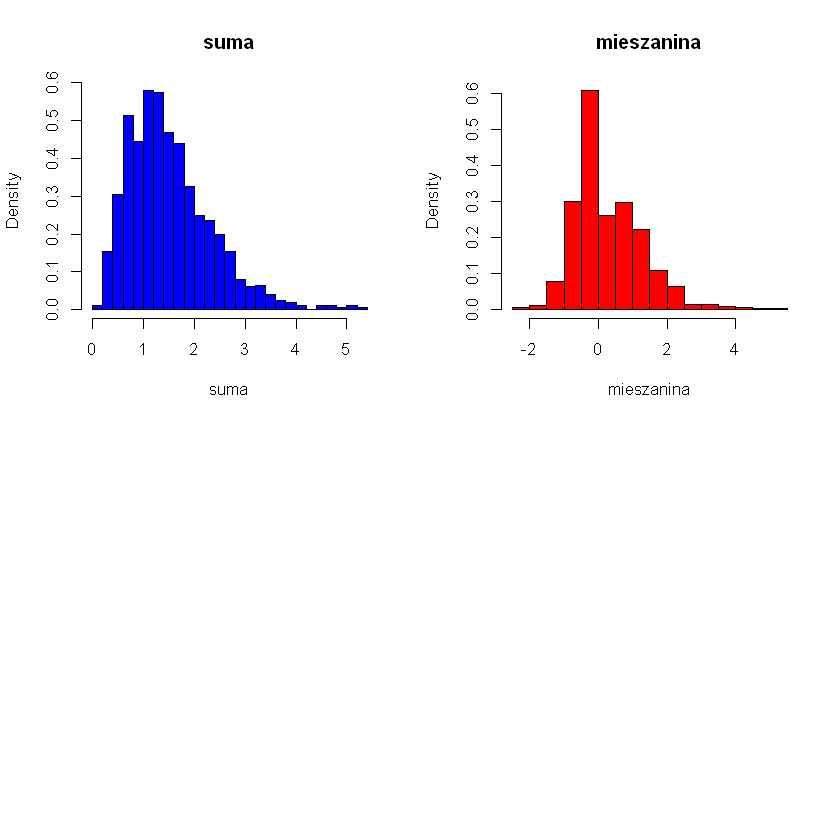

In [13]:
par(mfrow = c(2,2))
hist(suma, prob = TRUE, col = "blue", main = "suma", breaks = 20)
hist(mieszanina, prob = TRUE, col = "red", main = "mieszanina", breaks =20)